In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('../input/heart-attack-analysis-prediction-dataset/heart.csv')

In [3]:
data.info()   #checking the info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
data_corr=data.corr()

In [5]:
data_corr   #correalation of variables

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<AxesSubplot:>

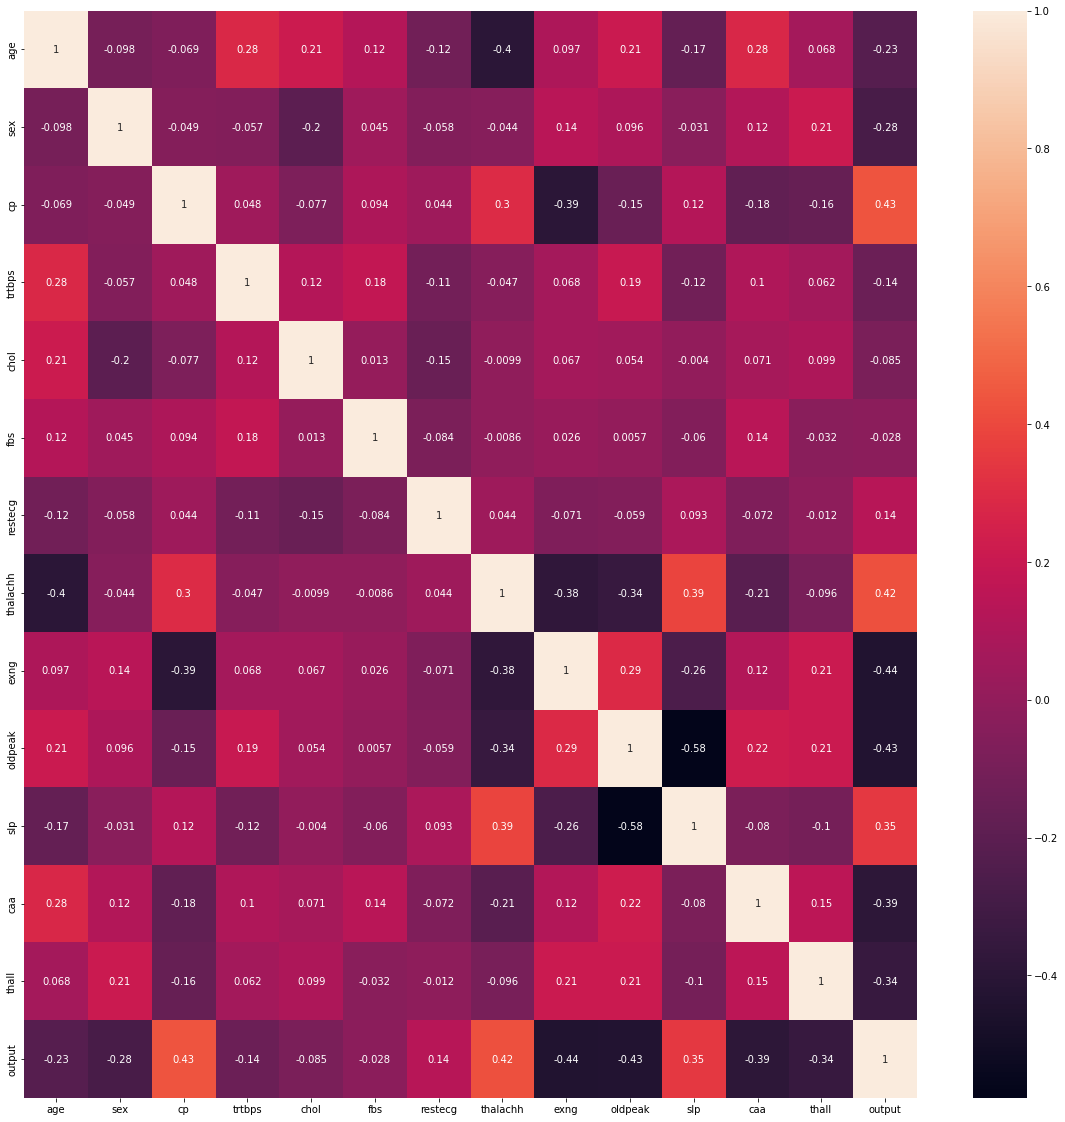

In [6]:
plt.figure(figsize=(20,20))
sns.heatmap(data=data_corr,annot=True)
#Heatmap for data

In [7]:
feature_value=np.array(data_corr['output'])
for i in range(len(feature_value)):
    if feature_value[i]<0:
        feature_value[i]=-feature_value[i]
feature_value

array([0.22543872, 0.28093658, 0.43379826, 0.14493113, 0.08523911,
       0.02804576, 0.1372295 , 0.42174093, 0.43675708, 0.430696  ,
       0.34587708, 0.39172399, 0.34402927, 1.        ])

In [8]:
features_corr=pd.DataFrame(feature_value,index=data_corr['output'].index,columns=['correalation'])

In [9]:
feature_sorted=features_corr.sort_values(by=['correalation'],ascending=False)

In [10]:
feature_sorted

,correalation
output,1.000000
exng,0.436757
cp,0.433798
oldpeak,0.430696
thalachh,0.421741
caa,0.391724
slp,0.345877
thall,0.344029
sex,0.280937
age,0.225439


In [11]:
feature_selected=feature_sorted.index

In [12]:
feature_selected     #selected features which are very much correalated

Index(['output', 'exng', 'cp', 'oldpeak', 'thalachh', 'caa', 'slp', 'thall',
       'sex', 'age', 'trtbps', 'restecg', 'chol', 'fbs'],
      dtype='object')

In [13]:
clean_data=data[feature_selected]

In [14]:
from sklearn.tree import DecisionTreeClassifier                  #using sklearn decisiontreeclassifier
from sklearn.model_selection import train_test_split

In [15]:
#making input and output dataset
X=clean_data.iloc[:,1:]
Y=clean_data['output']

In [16]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [17]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)     #data is splited in traing and testing dataset

(227, 13) (227,) (76, 13) (76,)


In [18]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [19]:
#training our model
dt=DecisionTreeClassifier(criterion='entropy',max_depth=6)
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [20]:
#predicting the value on testing data
y_pred=dt.predict(x_test)

In [21]:
#ploting the data
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(y_test,y_pred)
print(conf_mat)
accuracy=dt.score(x_test,y_test)
print("\nThe accuracy of decisiontreelassifier on Heart disease prediction dataset is "+str(round(accuracy*100,2))+"%")

[[24  9]
 [ 3 40]]

The accuracy of decisiontreelassifier on Heart disease prediction dataset is 84.21%
